In [1]:
import pandas as pd

In [2]:
de = {}

years = [2014, 2015, 2016]

# Load subsidies data for 'years'
de[2014] = pd.read_csv('data/de_2014.csv.gz')
de[2015] = pd.read_csv('data/de_2015.csv.gz')
de[2016] = pd.read_csv('data/de_2016.csv.gz')

# Get all Germany postcodes 
postcodes = pd.read_csv('data/German-Zip-Codes.csv', sep=';')

# Filter Niedersachsen postcodes
ns_postcodes = postcodes[postcodes.Bundesland == 'Niedersachsen']
ns_pcs = ns_postcodes.Plz.apply(str)

ns = {}
for year in years:
    ns[year] = de[year][de[year].recipient_postcode.str.slice(3).isin(ns_pcs)]

ns_l = []
for year in years:
    ns[year]['year'] = year
    ns_l.append(ns[year])

# Merge all subsidies data in one dataframe
ns_all = pd.concat(ns_l)



/home/aivuk/.virtualenvs/nabu/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [3]:
ns_all.to_csv('niedersachsen-subsidies.csv')

In [4]:
total_subsisdies = {year: ns[year]['amount'].sum() for year in years}
total_subsisdies

{2014: 1063567679.1999999, 2015: 1016431120.9499998, 2016: 981960225.8699999}

In [4]:
total_subsisdies2015 = ns2015['amount'].sum()
total_subsisdies2015

NameError: name 'ns2015' is not defined

# Looking at the top receivers

First thing that is interesting to look at is the top 50 receivers. The graph below already show us a very big difference in the values. Most of the subsidies were to milk industry farms. 

# 2016

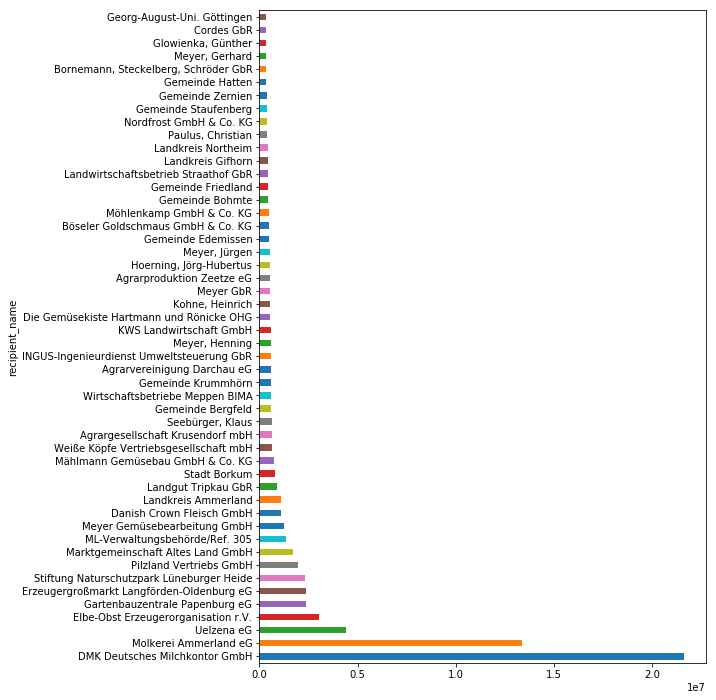

In [8]:
ns_all[ns_all['year'] == 2016].groupby('recipient_name')['amount'].sum().sort_values(ascending=False)[:50].plot.barh(figsize=(8,12))


# 2014

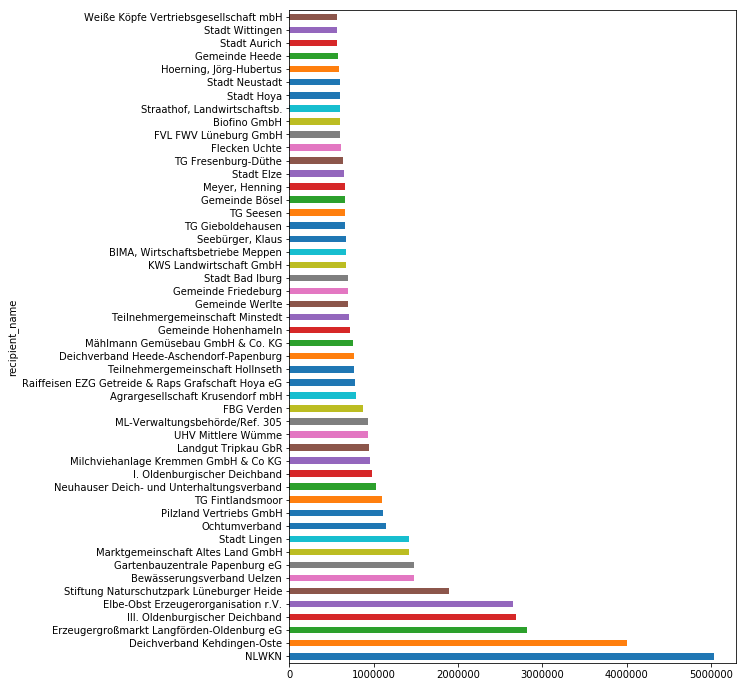

In [9]:
ns_all[ns_all['year'] == 2014].groupby('recipient_name')['amount'].sum().sort_values(ascending=False)[:50].plot.barh(figsize=(8,12))


# 2015

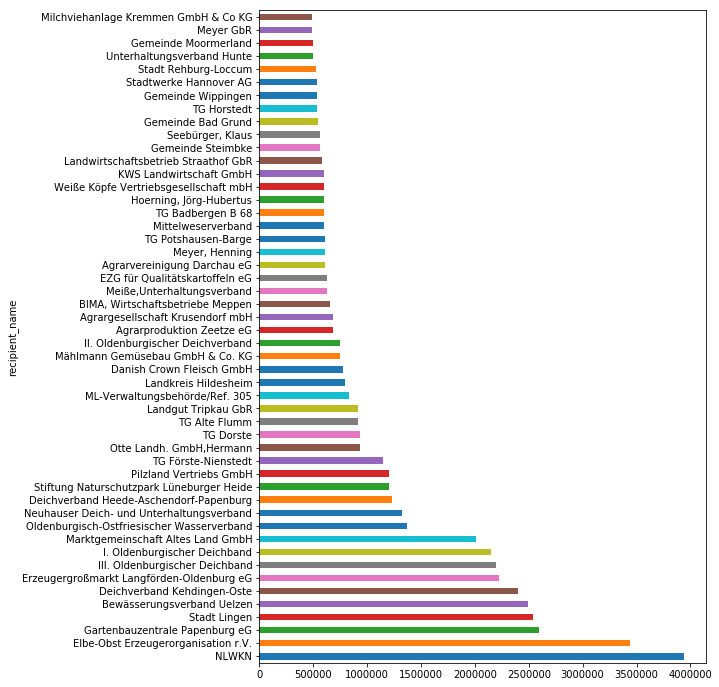

In [10]:
ns_all[ns_all['year'] == 2015].groupby('recipient_name')['amount'].sum().sort_values(ascending=False)[:50].plot.barh(figsize=(8,12))


# All years

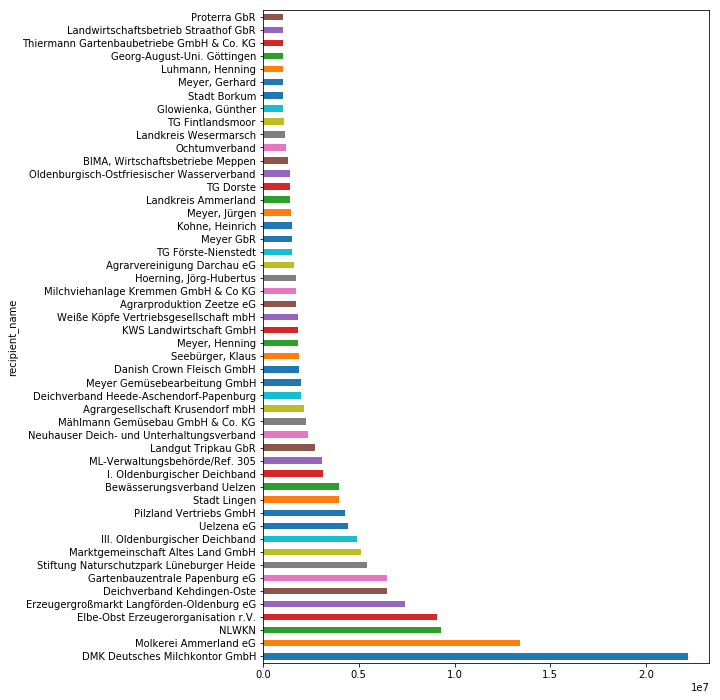

In [5]:
ns_all.groupby('recipient_name')['amount'].sum().sort_values(ascending=False)[:50].plot.barh(figsize=(8,12))

import matplotlib.pyplot as plt
#plt.savefig('biggest_receivers.png')

In [191]:
ns_all[ns_all.recipient_name == 'DMK Deutsches Milchkontor GmbH']

recipient_name  \
276124   DMK Deutsches Milchkontor GmbH   
276125   DMK Deutsches Milchkontor GmbH   
782347   DMK Deutsches Milchkontor GmbH   
1187181  DMK Deutsches Milchkontor GmbH   
1187182  DMK Deutsches Milchkontor GmbH   

                                    recipient_id recipient_postcode  \
276124   DE-0b002a50-6be2-49d9-97e8-5314954dca73           DE-27404   
276125   DE-0b002a50-6be2-49d9-97e8-5314954dca73           DE-27404   
782347   DE-07b95f48-809d-4fcb-a543-ce4672c46b44           DE-27404   
1187181  DE-92b47e14-87d7-4918-9da0-f8e9d68c15b6           DE-27404   
1187182  DE-92b47e14-87d7-4918-9da0-f8e9d68c15b6           DE-27404   

        recipient_location                                        scheme  \
276124               Zeven                      EGFL: Schulmilchprogramm   
276125               Zeven  EGFL: Beihilfen für die private Lagerhaltung   
782347               Zeven  EGFL: Beihilfen für die private Lagerhaltung   
1187181              Zeven  EGFL: Beihilfen für die private Lagerhaltung   
1187182              Zeven                EGFL: Öffentliche Intervention   

              amount currency  year country  
276124      72718.05      EUR  2014      DE  
276125      84374.72      EUR  2014      DE  
782347     399140.09      EUR  2015      DE  
1187181    538939.73      EUR  2016      DE  
1187182  21101402.21      EUR  2016      DE

In [56]:
ns[ns.recipient_name == 'DMK Deutsches Milchkontor GmbH']['amount'].sum()/ns['amount'].sum()


0.022037900690760698

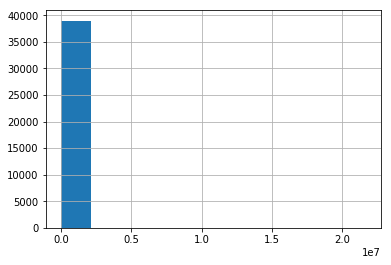

In [27]:
ns.groupby('recipient_name')['amount'].sum().sort_values(ascending=False).hist()

In [38]:
ns['amount'].mean(), ns['amount'].std()

(5051.677491704521, 59970.94824209434)

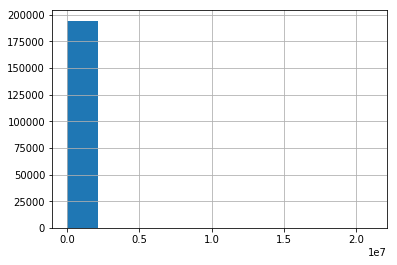

In [36]:
ns['amount'].hist()

# Subsidies bigger than 1000000

In [18]:
nsMillion = ns_all[ns_all['amount'] > 1000000]
nsMillion

recipient_name  \
29754                   Deichverband Kehdingen-Oste   
30274           Elbe-Obst Erzeugerorganisation r.V.   
45824                III. Oldenburgischer Deichband   
47805                Gartenbauzentrale Papenburg eG   
54720                    Bewässerungsverband Uelzen   
94065     Erzeugergroßmarkt Langförden-Oldenburg eG   
266200    Stiftung Naturschutzpark Lüneburger Heide   
284010                                        NLWKN   
284011                                        NLWKN   
291376                             TG Fintlandsmoor   
419061                                 Stadt Lingen   
489380            Marktgemeinschaft Altes Land GmbH   
490439    Neuhauser Deich- und Unterhaltungsverband   
514137                      Pilzland Vertriebs GmbH   
52822                III. Oldenburgischer Deichband   
131144                   Bewässerungsverband Uelzen   
151939                                 Stadt Lingen   
233295                                        NLWKN   
233296                                        NLWKN   
413454      Deichverband Heede-Aschendorf-Papenburg   
424403   Oldenburgisch-Ostfriesischer Wasserverband   
439988                          TG Förste-Nienstedt   
480314          Elbe-Obst Erzeugerorganisation r.V.   
486657                      Pilzland Vertriebs GmbH   
529554               Gartenbauzentrale Papenburg eG   
620855                 I. Oldenburgischer Deichband   
671278    Erzeugergroßmarkt Langförden-Oldenburg eG   
681226            Marktgemeinschaft Altes Land GmbH   
895804                  Deichverband Kehdingen-Oste   
923380    Neuhauser Deich- und Unterhaltungsverband   
94737           Elbe-Obst Erzeugerorganisation r.V.   
184969                                   Uelzena eG   
930782                 Meyer Gemüsebearbeitung GmbH   
1031863              Gartenbauzentrale Papenburg eG   
1131026           Marktgemeinschaft Altes Land GmbH   
1157442                     Pilzland Vertriebs GmbH   
1174893                         Landkreis Ammerland   
1187182              DMK Deutsches Milchkontor GmbH   
1227707   Erzeugergroßmarkt Langförden-Oldenburg eG   
1272782                   Danish Crown Fleisch GmbH   
1284251                       Molkerei Ammerland eG   

                                    recipient_id recipient_postcode  \
29754    DE-17123f42-5e94-4695-ad5e-349594f65a29           DE-21706   
30274    DE-b837dc82-1335-46fe-860c-b00fd496d136           DE-21723   
45824    DE-607f6f29-9b24-4521-b699-48c130079695           DE-26441   
47805    DE-901be155-3479-43cd-843e-7251900a5ecb           DE-26871   
54720    DE-c1cbd384-461c-45fa-95cc-3a912dd738c9           DE-29525   
94065    DE-4831e64b-3c04-4b94-84d2-76204c3821ed           DE-49377   
266200   DE-185eae7f-5a43-4ad0-8abf-5fa688bb30a9           DE-29646   
284010   DE-a7bd6ef0-33e1-410b-8cb1-950cda17be02           DE-26506   
284011   DE-a7bd6ef0-33e1-410b-8cb1-950cda17be02           DE-26506   
291376   DE-e5f31d76-9410-4dea-b4ab-bbf0d6d4a1ab           DE-26188   
419061   DE-7a56fefa-4d58-4d16-b3b4-a4354001b27c           DE-49808   
489380   DE-57bbf6e7-c509-4211-8b80-1bd57cf70fcc           DE-21635   
490439   DE-e67eebac-f0f8-4e30-aa67-a628aa866051           DE-19273   
514137   DE-ebfc382c-9e55-48d1-9c24-fcb411a1a483           DE-49429   
52822    DE-4603bc56-3136-47bf-912f-37de3e83e1bb           DE-26441   
131144   DE-e0d47b89-364b-4420-a547-b2484be230af           DE-29525   
151939   DE-296c257a-3fd0-48b4-ac1d-b03257c32561           DE-49808   
233295   DE-a2f11abc-5015-4edf-895f-a3183ba5acc2           DE-26506   
233296   DE-a2f11abc-5015-4edf-895f-a3183ba5acc2           DE-26506   
413454   DE-a9d54817-c4da-402d-92bb-2445cc562830           DE-26871   
424403   DE-93f1a5c0-3543-4f9c-a141-bfa738c240a6           DE-26919   
439988   DE-2b69e879-79e4-4096-9487-6696e320a7c9           DE-37083   
480314   DE-4fc3155a-5795-4aca-8f88-8405623685f6           DE-21723   
486657   DE-3629865f-8

# Recipients with subsidies bigger than 1000000


In [19]:
# Recipients with subsidies bigger than 1000000

nsMillion['recipient_name'].value_counts()

NLWKN                                         4
Gartenbauzentrale Papenburg eG                3
Erzeugergroßmarkt Langförden-Oldenburg eG     3
Pilzland Vertriebs GmbH                       3
Elbe-Obst Erzeugerorganisation r.V.           3
Marktgemeinschaft Altes Land GmbH             3
Neuhauser Deich- und Unterhaltungsverband     2
Bewässerungsverband Uelzen                    2
Deichverband Kehdingen-Oste                   2
Stadt Lingen                                  2
III. Oldenburgischer Deichband                2
DMK Deutsches Milchkontor GmbH                1
Molkerei Ammerland eG                         1
Oldenburgisch-Ostfriesischer Wasserverband    1
Meyer Gemüsebearbeitung GmbH                  1
TG Fintlandsmoor                              1
Deichverband Heede-Aschendorf-Papenburg       1
I. Oldenburgischer Deichband                  1
Danish Crown Fleisch GmbH                     1
Stiftung Naturschutzpark Lüneburger Heide     1
Landkreis Ammerland                     

In [62]:
nsMillion['amount'].sum()/total_subsisdies

0.054668037305114686

In [63]:
nsHalfMillion = ns[(ns['amount'] > 500000) & (ns['amount'] < 1000000)]
nsHalfMillion

recipient_name  \
157893                                Stadt Borkum   
187335   Stiftung Naturschutzpark Lüneburger Heide   
187339   Stiftung Naturschutzpark Lüneburger Heide   
188592   INGUS-Ingenieurdienst Umweltsteuerung GbR   
188620              ML-Verwaltungsbehörde/Ref. 305   
188621              ML-Verwaltungsbehörde/Ref. 305   
190449    Die Gemüsekiste Hartmann und Rönicke OHG   
278294                           Gemeinde Bergfeld   
1020097      Weiße Köpfe Vertriebsgesellschaft mbH   
1187181             DMK Deutsches Milchkontor GmbH   

                                    recipient_id recipient_postcode  \
157893   DE-6b7616f5-3cfa-476e-96c9-caf8c8e68fb9           DE-26757   
187335   DE-9cd64e24-f2cf-456f-9e63-30a29dc2ff7c           DE-29646   
187339   DE-9cd64e24-f2cf-456f-9e63-30a29dc2ff7c           DE-29646   
188592   DE-bec198f5-6d34-4b46-85fb-0480f9c4feac           DE-30163   
188620   DE-765559b6-51b9-4b97-8f2d-5114304c4d9c           DE-30169   
188621   DE-765559b6-51b9-4b97-8f2d-5114304c4d9c           DE-30169   
190449   DE-991982b5-704c-45be-8a2e-67e194b768b9           DE-30966   
278294   DE-57750a18-e2cd-42dc-b0a2-623ccd4caed1           DE-38467   
1020097  DE-d5909a9e-c56a-4cf5-9541-0c6cbde3a571           DE-49685   
1187181  DE-92b47e14-87d7-4918-9da0-f8e9d68c15b6           DE-27404   

                 recipient_location  \
157893                       Borkum   
187335                    Bispingen   
187339                    Bispingen   
188592   Hannover, Landeshauptstadt   
188620   Hannover, Landeshauptstadt   
188621   Hannover, Landeshauptstadt   
190449                    Hemmingen   
278294                     Bergfeld   
1020097                      Emstek   
1187181                       Zeven   

                                                    scheme     amount  \
157893               ELER: Dorferneuerung und -entwicklung  799954.00   
187335                                   EGFL: Basisprämie  850917.22   
187339         ELER: Agrarumwelt- und Klimaschutzmaßnahmen  997442.04   
188592   ELER: Beratungs-, Betriebsführungs- und Vertre...  587497.05   
188620                              ELER: Technische Hilfe  796550.63   
188621                              ELER: Technische Hilfe  547414.03   
190449                EGFL: Schulobst- und -gemüseprogramm  563287.95   
278294               ELER: Dorferneuerung und -entwicklung  602000.00   
1020097          EGFL: Beihilfen im Obst- und Gemüsesektor  656077.52   
1187181       EGFL: Beihilfen für die private Lagerhaltung  538939.73   

        currency  year country  
157893       EUR  2016      DE  
187335       EUR  2016      DE  
187339       EUR  2016      DE  
188592       EUR  2016      DE  
188620       EUR  2016      DE  
188621       EUR  2016      DE  
190449       EUR  2016      DE  
278294       EUR  2016      DE  
1020097      EUR  2016      DE  
1187181      EUR  2016      DE

In [64]:
nsHalfMillion['amount'].sum()/total_subsisdies

0.0070675776749014535

In [71]:
nsLessHalfMillion = ns[ns['amount'] < 500000]
nsLessHalfMillion

recipient_name  \
79201        Agrargesellschaft Melkof mbH   
79202        Agrargesellschaft Melkof mbH   
79203        Agrargesellschaft Melkof mbH   
79204        Agrargesellschaft Melkof mbH   
79205        Agrargesellschaft Melkof mbH   
79206                   Agrar Zeetze GmbH   
79207                   Agrar Zeetze GmbH   
79208                   Agrar Zeetze GmbH   
79209                   Agrar Zeetze GmbH   
79210                   Agrar Zeetze GmbH   
79211    Agrargesellschaft Krusendorf mbH   
79212    Agrargesellschaft Krusendorf mbH   
79213    Agrargesellschaft Krusendorf mbH   
79214    Agrargesellschaft Krusendorf mbH   
79215    Agrargesellschaft Krusendorf mbH   
79216    Agrargesellschaft Krusendorf mbH   
79217                Agrar-Land Haar GmbH   
79218                Agrar-Land Haar GmbH   
79219                Agrar-Land Haar GmbH   
79220                Agrar-Land Haar GmbH   
79221           Agrarproduktion Zeetze eG   
79222           Agrarproduktion Zeetze eG   
79223           Agrarproduktion Zeetze eG   
79224           Agrarproduktion Zeetze eG   
79225           Agrarproduktion Zeetze eG   
79226           Agrarproduktion Zeetze eG   
79228                        Beckmann GbR   
79229                        Beckmann GbR   
79230                        Beckmann GbR   
79231                        Beckmann GbR   
...                                   ...   
1325321                       Vogt, Sören   
1325322                       Voß, Jürgen   
1325323                       Voß, Jürgen   
1325324                       Voß, Jürgen   
1325325                       Voß, Jürgen   
1325326                Waldschmidt, Harry   
1325327                Waldschmidt, Harry   
1325328                Waldschmidt, Harry   
1325329                Waldschmidt, Harry   
1325330                Waldschmidt, Harry   
1325331                 Weitzbrich, Peter   
1325332                 Weitzbrich, Peter   
1325333                 Weitzbrich, Peter   
1325334                 Weitzbrich, Peter   
1325335                 Weitzbrich, Peter   
1325336                 Weitzbrich, Peter   
1325337                 Weitzbrich, Peter   
1325338                 Wedler, Urs-André   
1325339                 Wedler, Urs-André   
1325340                 Wedler, Urs-André   
1325341                 Wedler, Urs-André   
1325342                 Wedler, Urs-André   
1325343                      Welge, Erwin   
1325344                      Welge, Erwin   
1325345                      Welge, Erwin   
1325346                     Werner, Marco   
1325347                     Werner, Marco   
1325348                     Werner, Marco   
1325349                     Werner, Marco   
1325350                     Werner, Marco   

                                    recipient_id recipient_postcode  \
79201    DE-c13e11a6-055b-491b-88fe-bdb778c88254           DE-19273   
79202    DE-c13e11a6-055b-491b-88fe-bdb778c88254           DE-19273   
79203    DE-c13e11a6-055b-491b-88fe-bdb778c88254           DE-19273   
79204    DE-c13e11a6-055b-491b-88fe-bdb778c88254           DE-19273   
79205    DE-c13e11a6-055b-491b-88fe-bdb778c88254           DE-19273   
79206    DE-6d6a8bee-2cce-45de-b3f1-08f0139bb10f           DE-19273   
79207    DE-6d6a8bee-2cce-45de-b3f1-08f0139bb10f           DE-19273   
79208    DE-6d6a8bee-2cce-45de-b3f1-08f0139bb10f           DE-19273   
79209    DE-6d6a8bee-2cce-45de-b3f1-08f0139bb10f           DE-19273   
79210    DE-6d6a8bee-2cce-45de-b3f1-08f0139bb10f           DE-19273   
79211    DE-b51c2081-8348-4864-8882-624249258dec           DE-19273   
79212    DE-b51c2081-8348-4864-8882-624249258dec           DE-19273   
79213    DE-b51c2081-8348-4864-8882-624249258dec           DE-19273   
79214    DE-b51c2081-8348-4864-8882-624249258dec           DE-19273   
79215    DE-b51c2081-8348-4864-8882-624249258dec           DE-19273   
79216    DE-b51c2081-8348-4864-8882-624249258dec           DE-19273   
79217    DE-3a352b90-d496-4ee

In [72]:
nsLessHalfMillion['amount'].sum()/total_subsisdies

0.938264385019984

In [75]:
ns[ns['amount']< 10000]['amount'].sum()/total_subsisdies

0.3525361518215197

In [76]:
ns[(ns['amount']> 10000) & (ns['amount']< 20000)]['amount'].sum()/total_subsisdies

0.2296090853071367

In [77]:
ns[(ns['amount']> 20000) & (ns['amount']< 30000)]['amount'].sum()/total_subsisdies

0.1243636543036187

In [78]:
ns[(ns['amount']> 40000) & (ns['amount']< 50000)]['amount'].sum()/total_subsisdies

0.039663981263082564

In [146]:
under60000 = ns[ns['amount']< 60000].sort_values(by='amount', ascending=False)


#under60000[under60000['recipient_name'].str.contains('Meyer', na=False)].sort_values('ammount', ascending=False)['recipient_name'][:100])/len(under10000['recipient_name'].unique())

In [20]:
# TODO: Bar graph for the groups

In [195]:
ns_all[ns_all['amount'] < 60000].shape[0]/ns_all.shape[0]

0.9852538615723316

In [167]:
under60000_15 = ns2015[ns2015['amount']< 60000].sort_values(by='amount', ascending=False)


In [161]:
top100 = under60000.groupby('recipient_name')['amount'].sum().sort_values(ascending=False)[:22]
top100

In [162]:
len(top100[['Meyer' in idx for idx in top100.index]])

17

In [196]:
under60000_15.groupby('recipient_name')['amount'].sum().sort_values(ascending=False)

recipient_name
Meyer, Jürgen              409006.23
Meyer, Henning             321801.86
Meyer, Christian           301975.90
Meyer, Jens                276103.45
Meyer, Heinrich            250901.38
Meyer, Johann              220630.61
Meyer GbR                  218986.17
Meyer, Cord                216311.50
Meyer, Hermann             207440.49
Meyer, Carsten             193489.93
Meyer, Frank               187928.33
Meyer, Wilfried            184369.21
Janssen, Gerhard           179938.97
Meyer, Friedrich           174802.72
Meyer, Helmut              172934.63
Meyer, Gerhard             169512.95
Meyer, Ralf                168642.33
Meyer, Wilhelm             165856.03
Müller, Andreas            161178.12
Meyer, Gerd                160052.96
Müller, Heiko              159698.92
Meyer, Werner              158643.41
Harms, Udo                 157878.98
Müller, Thomas             156079.90
Heuer GbR                  154850.37
Müller, Karsten            151469.35
Meyer, Heinz           

In [171]:
ns2015[ns2015.recipient_name == 'Meyer, Jürgen']['amount'].sum()

469717.58

In [90]:
ns[ns['recipient_name'].str.contains('Meyer', na=False)]['amount'].sum()

23099409.310000002

In [132]:
ns[ns['recipient_name'].str.contains('Meyer', na=False)]['recipient_name'].value_counts()

Meyer, Jürgen                   112
Meyer, Hermann                   65
Meyer, Wilfried                  61
Meyer, Johann                    59
Meyer, Heinrich                  58
Meyer GbR                        54
Meyer, Henning                   54
Meyer, Carsten                   53
Meyer, Christian                 50
Meyer, Jens                      49
Meyer, Ralf                      46
Meyer, Wilhelm                   45
Meyer, Heinz                     45
Meyer, Friedrich                 42
Meyer, Andreas                   39
Meyer, Werner                    35
Meyer, Frank                     35
Meyer, Hartmut                   34
Meyer, Bernd                     32
Meyer, Cord                      30
Meyer, Uwe                       29
Meyer, Heiko                     29
Meyer, Herbert                   28
Meyer, Helmut                    28
Meyer, Karl-Heinz                27
Meyer, Johannes                  27
Meyer, Reinhard                  27
Meyer, Gerhard              

In [133]:
ns[ns.recipient_name == 'Meyer, Jürgen']['scheme'].value_counts()

EGFL: Greening-Prämie                                        24
EGFL: Umverteilungsprämie                                    24
EGFL: Basisprämie                                            24
EGFL: Erstattung nicht genutzter Mittel der Krisenreserve    22
ELER: Agrarumwelt- und Klimaschutzmaßnahmen                   9
ELER: Ausgleichszulage benachteiligte Gebiete                 8
ELER: Ökologischer Landbau                                    1
Name: scheme, dtype: int64

In [1]:
import json

In [136]:
pz = json.load(open('postleitzahlen/data/postleitzahlen.geojson'))

In [12]:
ns_all.columns

Index(['recipient_name', 'recipient_id', 'recipient_postcode',
       'recipient_location', 'scheme', 'amount', 'currency', 'year',
       'country'],
      dtype='object')

In [137]:
ns_pz = [p for p in pz['features'] if int(p['properties']['postcode']) in list(ns_postcodes['Plz'])]

In [26]:
len(ns_pz)

848

In [138]:
ns_pz_geojson = {'type': pz['type'], 'crs': pz['crs'], 'features': ns_pz}

In [139]:
ns_pz_file = open('ns_pz.geojson', 'w')

In [140]:
json.dump(ns_pz_geojson, ns_pz_file)

In [34]:
pz.keys()

dict_keys(['type', 'crs', 'features'])

In [141]:
ns_pz_file.flush()

In [39]:
ns_all['year'].unique()

array([2014, 2015, 2016])

In [5]:
ns2016m = ns_all[(ns_all['year'] == 2016) & (ns_all['amount'] < 60000)]
grouped2016m  = ns2016m.groupby('recipient_postcode')['amount'].sum()
total2016m = ns2016m['amount'].sum()

grouped2016m.index = pd.Index([int(g[3:]) for g in grouped2016m.index])
ns2016m_df = pd.DataFrame({'plz': [str(i) for i in grouped2016m.index], 'amount': grouped2016m.values})

In [9]:
ns2016 = ns_all[(ns_all['year'] == 2016)]
grouped2016  = ns2016.groupby('recipient_postcode')['amount'].sum()
total2016 = ns2016['amount'].sum()

In [45]:
ns2016c = ns_all[(ns_all['year'] == 2016)]
grouped2016c  = ns2016c.groupby('recipient_postcode').size()

In [46]:
grouped2016c

recipient_postcode
DE-19273     464
DE-21217     186
DE-21218     104
DE-21220     119
DE-21224     207
DE-21227      14
DE-21228       9
DE-21244     168
DE-21255     354
DE-21256      75
DE-21258     172
DE-21259     142
DE-21261      80
DE-21266     111
DE-21271     191
DE-21272     115
DE-21274      48
DE-21279     220
DE-21335      55
DE-21337      31
DE-21339      24
DE-21354     389
DE-21357     256
DE-21358      43
DE-21360      10
DE-21365      16
DE-21368     249
DE-21369      86
DE-21371      36
DE-21376     258
            ... 
DE-49685     865
DE-49688     796
DE-49692     514
DE-49696     700
DE-49699     590
DE-49716     898
DE-49733    1086
DE-49740     788
DE-49744     734
DE-49751     594
DE-49757     727
DE-49762     615
DE-49767     501
DE-49770     433
DE-49774     450
DE-49777     429
DE-49779     234
DE-49808     138
DE-49809      42
DE-49811     628
DE-49824     997
DE-49828     815
DE-49832    1041
DE-49835     610
DE-49838     825
DE-49843     672
DE-49844    

In [47]:
grouped2016c.index = pd.Index([int(g[3:]) for g in grouped2016c.index])

In [101]:
grouped2016 = 100*grouped2016/total2016

In [104]:
grouped2016.mean()

0.12870012870012873

In [92]:
total2016

833902739.96

In [18]:
ns2016_df['amount'].min()

138.34

In [48]:
ns2016c_df = pd.DataFrame({'plz': [str(i) for i in grouped2016c.index], 'amount': grouped2016c.values})

In [105]:
!pip install folium

    100% |████████████████████████████████| 81kB 1.1MB/s 
  Using cached requests-2.18.4-py2.py3-none-any.whl
  Using cached urllib3-1.22-py2.py3-none-any.whl
  Using cached certifi-2018.1.18-py2.py3-none-any.whl
  Running setup.py bdist_wheel for folium ... done
  Stored in directory: /home/aivuk/.cache/pip/wheels/04/d0/a0/b2b8356443364ae79743fce0b9b6a5b045f7560742129fde22
Successfully built folium


In [3]:
import folium


def filter_range(min_value=0, max_value=60000, year=2016, subtype='EGFL: Basisprämie'):
    #  ns_filtered = ns_all[(ns_all['year'] == year) & (ns_all['scheme'] == subtype) & (ns_all['amount'] >= min_value) & (ns_all['amount'] <= max_value)]
    ns_filtered = ns_all[(ns_all['year'] == year) & (ns_all['scheme'] == subtype)]    
    #grouped  = ns_filtered.groupby('recipient_postcode')['recipient_name'].agg('count')
    grouped  = ns_filtered.groupby('recipient_postcode')['amount'].sum()
    total = ns_filtered['amount'].sum()

    grouped.index = pd.Index([int(g[3:]) for g in grouped.index])
    ns_filtered_df = pd.DataFrame({'plz': [str(i) for i in grouped.index], 'amount': grouped.values})

    return ns_filtered_df
    
def map_values(name='map', min_value=0, max_value=60000, year=2016, subtype='EGFL: Basisprämie'):
    ns_geo = './ns_pz.geojson'


    m = folium.Map(location=[52.825495, 9.279066], zoom_start=7)
    df = filter_range(min_value, max_value, year, subtype)
    
    m.choropleth(
        geo_data=ns_geo,
        name='total subsidy',
        data=df,
        columns=['plz', 'amount'],
        key_on='feature.properties.postcode',
        fill_color='YlOrRd',
        fill_opacity=0.7,
        line_opacity=0.2,
        legend_name=subtype
    )

    folium.LayerControl().add_to(m)

    m.save('{}.html'.format(name))
    # return m

In [4]:
subtypes = ['EGFL: Greening-Prämie', 'ELER: Agrarumweltmaßnahmen',  'ELER: Agrarumwelt- und Klimaschutzmaßnahmen', 'ELER: Natur- und Gewässerschutz auf landwirtschaftlichen Flächen', 'ELER: Ökologischer Landbau']

for ti, t in enumerate(subtypes):
    map_values(name='map-sum-2016-{}'.format(ti), year=2016, min_value=0, max_value=3000000, subtype=t)

In [5]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [6]:
interact(map_values, year=widgets.Select(
    options=[2014, 2015, 2016], values=[2014, 2015, 2016]))

<function __main__.map_values>

In [15]:
ns_all['scheme'].value_counts().sort_values(ascending=False)

EGFL: Direktzahlungen                                                                                    88013
EGFL: Umverteilungsprämie                                                                                85929
EGFL: Erstattung nicht genutzter Mittel der Krisenreserve                                                75691
EGFL: Basisprämie                                                                                        41183
EGFL: Greening-Prämie                                                                                    41164
ELER: Agrarumweltmaßnahmen                                                                               23163
ELER: Ausgleichszulage benachteiligte Gebiete                                                            13122
ELER: Agrarumwelt- und Klimaschutzmaßnahmen                                                              12556
EGFL: Junglandwirteprämie                                                                                 2794
E

In [24]:
ns_all[ns_all['year'] == 2016]['scheme'].value_counts().sort_values(ascending=False)

EGFL: Umverteilungsprämie                                                                                41184
EGFL: Basisprämie                                                                                        41183
EGFL: Greening-Prämie                                                                                    41164
EGFL: Erstattung nicht genutzter Mittel der Krisenreserve                                                37515
ELER: Ausgleichszulage benachteiligte Gebiete                                                            13048
ELER: Agrarumwelt- und Klimaschutzmaßnahmen                                                              12539
EGFL: Junglandwirteprämie                                                                                 2794
EGFL: Befristete Sonderbeihilfe für Erzeuger der Tierhaltungssektoren                                     2143
ELER: Ökologischer Landbau                                                                                1089
E

In [30]:
ns_all[ns_all['amount'] <= 50]

recipient_name                             recipient_id  \
27383                  Voß, Carsten  DE-d424918b-a3f9-403e-aa04-f59dd6fe0be4   
29818                           NaN  DE-376dec10-5378-4571-b2ce-e5e93530e78d   
48200                Hemken, Albert  DE-bef2071f-6a8f-4986-9f05-638e00298ea6   
56222                           NaN  DE-9fb7180a-29f1-4e60-9637-652b87c68270   
57428                  Cohrs, Fritz  DE-7ac775f2-2294-43eb-9b7e-9bd8538bcdfa   
60673              BG Sporleder GbR  DE-a4739eb9-0bcb-4ce0-88d7-0ad6dce41097   
71836              Arend, Engelbert  DE-d905275d-54e1-466a-838a-e4de1678aad6   
71907             Biermann, Stephan  DE-8110ec94-61b9-4b55-b5ea-5b29a29f4b89   
71909                 Bock, William  DE-6fe7b785-0726-48c8-a4c6-4efe921bfec7   
71976               BG Elbingen GbR  DE-cef2dd20-edac-47db-854d-d100ed8aef7f   
262972                          NaN  DE-0f1e13ca-8cca-41ef-896f-2d7e37ac2feb   
265762                          NaN  DE-5afcda92-210e-43c1-b949-a330acae59ec   
285021                          NaN  DE-08745e59-96a4-4f01-89bd-a863fd45796b   
286499                          NaN  DE-79b5d222-ddc7-40c0-a28c-42362e501517   
300974           Linnekuhl, Stephan  DE-3f330e19-0c91-4d5e-a26f-d4c62214d4f1   
402450             Peters, Bernhard  DE-0798164a-d874-4af6-a8ac-9a37e89ebb9f   
404256               Rolfes, Helmut  DE-6c9a7ad8-3362-45d1-a00a-5556e03446b9   
404872             Immken, Heinrich  DE-d7fb6ce6-3861-4129-b920-cfde0a76ffd0   
455869             Gebken, Heinrich  DE-76a12830-119d-4039-9e7e-70eeab7dbbcb   
463659                 Kühter, Anne  DE-4633a056-2ed1-4169-876c-9405f459f7ac   
472032              Niers, Bernhard  DE-29b2811b-fd84-4b0c-8e86-3a9ef3b72737   
490457   Schomacker, Klaus Heinrich  DE-919241e4-78f8-4911-9d60-a1ed450dbb19   
516739             Jünemann, Helmut  DE-6f7a693b-5949-493a-8c2e-07aaae97629c   
517202             Spiess, Heinrich  DE-30e88134-b8ce-40c0-97ef-f4afcad93656   
86               Meyer, Hans-Jürgen  DE-d96e01a0-6fdf-4ebd-9263-9fb9d3aff78a   
335              Weidenhöfer, Silke  DE-dba19d70-46dd-4db9-8f32-cca9d0678137   
425                     Fick, Peter  DE-c948cbe9-6e58-4a87-998c-c7ecd6beb4ee   
449                   Gusek, Lothar  DE-a9b7c6ce-852c-4bad-b3af-f2238a2d1a3b   
470                  Kahrs, Herbert  DE-712fdd2f-b1db-4860-b19d-07003fd2c77f   
611                  Kohrs, Andreas  DE-b2da199a-2ee7-4046-89ad-7754114594d8   
...                             ...                                      ...   
1314595           Schulte, Heinrich  DE-36f404a4-e086-40e9-8e08-1d1238a36edf   
1314608         Steingrefer, Dieter  DE-1a6dcdb5-34cd-42b3-a3c4-9dfccfcc3497   
1314612          Vahrmann, Bernhard  DE-29ebbfd3-c1d8-40bc-9730-0df7264f452a   
1314616           Stürwold, Andreas  DE-d1970d0d-baf2-4419-9f22-f85d006eb3da   
1314625           Vahrmann, Clemens  DE-9b596cd5-5ea7-409f-92b4-9642d1456e90   
1314641       von den Benken, Heinz  DE-d1e7cf61-4235-4682-8d05-b4ef01e6aece   
1314645             Wehry, Reinhard  DE-6e478dd3-37f1-4e67-90c6-5cbcda53fca0   
1314654             Wessels, Martin  DE-1bc815a1-5bc0-4bf3-aeba-b0adcdafc13c   
1314696              Wienken, Silce  DE-fd64062a-ce14-42c0-9a31-47e3d611d320   
1314765             Willoh, Wilhelm  DE-d7fdb28c-0931-4b8f-841c-3f817f5ca9b5   
1314769         Woltermann, Bernard  DE-5b10c23b-5990-4914-affe-f722c0561896   
1325008              Gellert, Tanja  DE-0399d207-3ca0-40ee-95ce-651b374aca15   
1325015                Graff, Jutta  DE-53ddeb56-f44b-49bd-bff1-8921fbfbe5e0   
1325030                 Grewe, Otto  DE-984a8cdc-fde1-4ba1-9f8a-ed717735d30b   
1325057           Haul, Fred-Erhard  DE-a5703939-f1a9-4bfb-a86d-c7d6eecf0d50   
1325063            Haushalter, Kurt  DE-02b7dc6c-4dbe-4b08-aadd-bdda86c6e796   
1325069          Hildebrandt, Bernd  DE-7328d790-b095-4716-ae21-0211470c7721   
1325095                Hose, Detlef  DE-b6bcb9ad-514f-4caa-8935-14e83c8e42c1   
1325100          Hose

In [19]:
scheme_hist = ns_all[ns_all.year == 2016].groupby('scheme').size().sort_values(ascending=False)

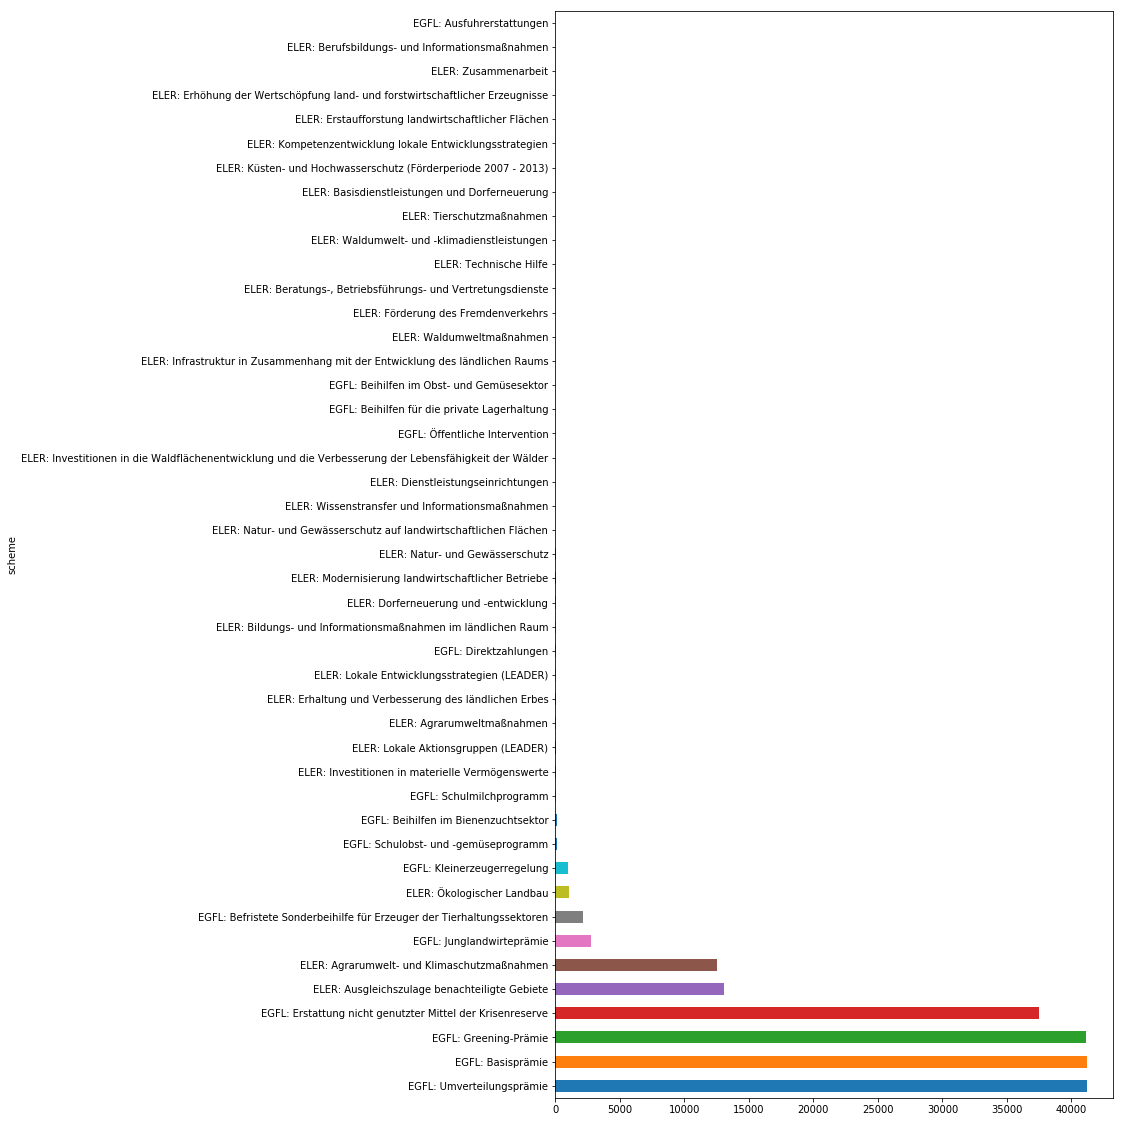

In [20]:
scheme_hist.plot.barh(figsize=(10,20))

In [21]:
scheme_hist

scheme
EGFL: Umverteilungsprämie                                                                                41184
EGFL: Basisprämie                                                                                        41183
EGFL: Greening-Prämie                                                                                    41164
EGFL: Erstattung nicht genutzter Mittel der Krisenreserve                                                37515
ELER: Ausgleichszulage benachteiligte Gebiete                                                            13048
ELER: Agrarumwelt- und Klimaschutzmaßnahmen                                                              12539
EGFL: Junglandwirteprämie                                                                                 2794
EGFL: Befristete Sonderbeihilfe für Erzeuger der Tierhaltungssektoren                                     2143
ELER: Ökologischer Landbau                                                                               

In [27]:
ns_all[(ns_all.year == 2016) & (ns_all['scheme'] == 'EGFL: Umverteilungsprämie')]['amount'].max()

3330.27